# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Pasquale Salomone

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

#### Question 1
Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [18]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                            Version
---------------------------------- --------------------
account                            0.1.0
aiohttp                            3.8.1
aiosignal                          1.2.0
alabaster                          0.7.12
alembic                            1.8.0
amqp                               2.6.1
anaconda-client                    1.11.2
anaconda-navigator                 2.1.4
anaconda-project                   0.11.1
anyio                              3.5.0
appdirs                            1.4.4
applaunchservices                  0.2.1
appnope                            0.1.2
appscript                          1.1.2
argh                               0.26.2
argon2-cffi                        21.3.0
argon2-cffi-bindings               21.2.0
asn1crypto                         1.5.1
astroid                            2.14.2
astropy                            5.1
asttokens                          2.0.5
async-timeout                      

In [1]:
import requests,pickle,io,re,spacy
from bs4 import BeautifulSoup
from contextlib import redirect_stdout
from spacytextblob.spacytextblob import SpacyTextBlob
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    html_content = response.text
    soup = BeautifulSoup(html_content, "html.parser")
    article = soup.find("article")

    if article:
        with open("article.pkl", "wb") as file:
            pickle.dump(str(article), file)
            print("Article HTML saved to file")
    else:
        print("Article not found")
else:
    print("Webpage Error")


Article HTML saved to file


#### Question 2
Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [2]:
# Read the article HTML from the file
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

soup = BeautifulSoup(html_content, "html.parser")
text = soup.get_text()
# removing empty lines for redability purposes
text_without_empty_lines = "\n".join(line for line in text.split("\n") if line.strip())

print(text_without_empty_lines)

How Laser Headlights Work
                130 Comments            
by:
Lewin Day
March 22, 2021
When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!
Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific

#### Question 3
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [3]:
# Load the spaCy model
nlp = spacy.load('en_core_web_lg')

# Process the article text
doc = nlp(text_without_empty_lines)
    
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
token_counter = Counter(tokens)
most_common_tokens = token_counter.most_common(5)
for item in most_common_tokens:
    print(item)



('laser', 35)
('headlights', 19)
('headlight', 11)
('technology', 10)
('led', 10)


#### Question 4
Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [4]:
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
lemma_counter_obj = Counter(lemmas)
most_common_lemmas = lemma_counter_obj.most_common(5)
for lemma in most_common_lemmas:
    print(lemma)

('laser', 40)
('headlight', 28)
('led', 16)
('beam', 12)
('technology', 10)


#### Question 5 
Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [5]:
def score_sentence_by_token(sentence, interesting_tokens): 
    """
    Calculates the score representing the proportion of interesting tokens found in a given sentence.

    Args:
        sentence (str): The input sentence to score.
        interesting_tokens (list): A list of interesting tokens to search for in the sentence.

    Returns:
        float or str: The score, which is the number of interesting lemmas found divided by the number of words in the sentence. If no interesting lemmas are found, the string 'No lemmas found' is returned.

    Raises:
        None

    """
    sentence_length = len(sentence.split())
    interesting_token = [token[0] for token in interesting_tokens]
    sentence = re.sub(r'[^\w\s]', '', sentence)
    counter = 0
    for _ in sentence.lower().split():
        if _ in interesting_token:
            counter+=1
    if counter>0:
        score = counter/sentence_length
        return score
    else:
        return 'No tokens found'

In [6]:
# testing the first sentence of the article
sentence= '''When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind'''

In [7]:
score_sentence_by_token(sentence.lower(),most_common_tokens)

0.1

In [8]:
def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Calculates the score representing the proportion of interesting lemmas found in a given sentence.

    Args:
        sentence (str): The input sentence to score.
        interesting_lemmas (list): A list of interesting lemmas to search for in the sentence.

    Returns:
        float or str: The score, which is the number of interesting lemmas found divided by the number of words in the sentence. If no interesting lemmas are found, the string 'No lemmas found' is returned.

    Raises:
        None

    """
    sentence_length = len(sentence.split())
    interesting_lemmas = [lemma[0] for lemma in interesting_lemmas]
    sentence = re.sub(r'[^\w\s]', '', sentence)
    counter = 0
    for _ in sentence.lower().strip().split():
        if _ in interesting_lemmas:
            counter+=1
    if counter>0:
        score = counter/sentence_length
        return score
    else:
        return 'No lemmas found'
    

In [9]:
score_sentence_by_lemma(sentence, most_common_lemmas)

0.05

#### Question 6
Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

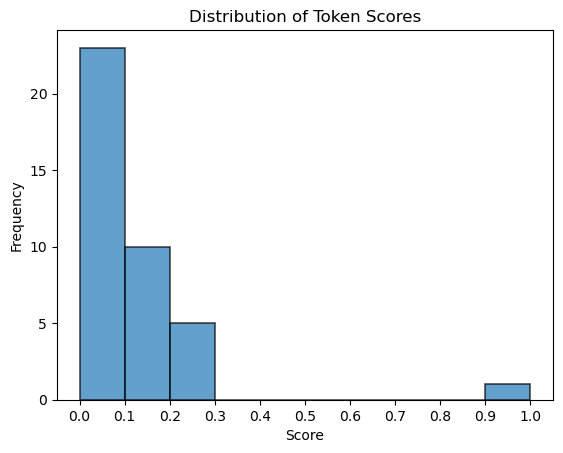

In [10]:
# using indexing and slicing to exclude the initial and last line of text 
# from the article

start_string = "2021"
start_index = text_without_empty_lines.index(start_string) + len(start_string)
text_to_process = text_without_empty_lines[start_index:]
doc = nlp(text_to_process)
sentences = sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]
sentences = sentences[:54]
tokens_hist_values = [score_sentence_by_token(sentence, most_common_tokens) for sentence in sentences if score_sentence_by_token(sentence, most_common_tokens) != 'No tokens found']
plt.hist(tokens_hist_values, bins=10, range=(0, 1),edgecolor='black', linewidth=1.2,alpha=0.7)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Token Scores')

plt.show();

#### From the histogram above it seems that the most common range of scores falls between 0 and 0.1 .

#### Question 7
Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

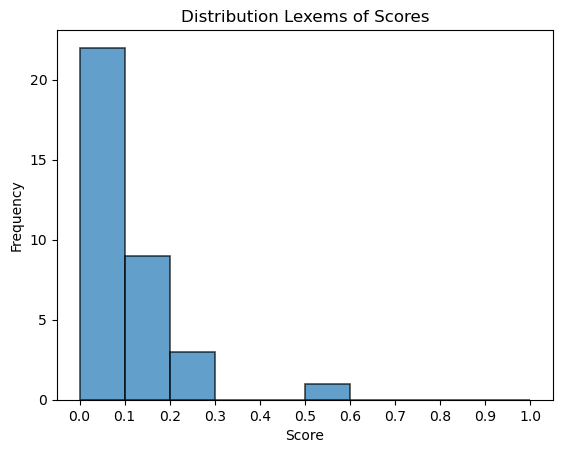

In [11]:
start_string = "2021"
start_index = text_without_empty_lines.index(start_string) + len(start_string)
text_to_process = text_without_empty_lines[start_index:]
doc = nlp(text_to_process)
sentences = sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]
sentences = sentences[:54]
lemmas_hist_values = [score_sentence_by_lemma(sentence, most_common_lemmas) for sentence in sentences if score_sentence_by_lemma(sentence, most_common_lemmas) != 'No lemmas found']
plt.hist(lemmas_hist_values, bins=10, range=(0, 1),edgecolor='black', linewidth=1.2,alpha=0.7)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution Lexems of Scores')

plt.show();

#### From the histogram above it seems that the most common range of scores falls between 0 and 0.1 .

#### Question 8
Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

In [12]:
def is_noun_list(word_list):
    """
    Checks if a list of words consists only of nouns.

    Parameters:
    - word_list (list): A list of words to be checked.

    Prints a message for each word in the list that is not classified as a noun,
    indicating the word, its part-of-speech (POS) tag, and that it would be excluded
    from the original list.

    Returns:
    None
    """
    for word in word_list:
        doc = nlp(word)
        for token in doc:
            if token.pos_ != "NOUN":
                print(str(token) +" is a "+str(token.pos_).lower()\
                      +" and it would be excluded from the original list")
   
        

In [13]:
# shows what lexems are not included based on question 8 directions
is_noun_list([x[0] for x in most_common_lemmas])

led is a verb and it would be excluded from the original list


In [14]:
# shows what tokens are not included based on question 8 directions
is_noun_list([x[0] for x in most_common_tokens])


led is a verb and it would be excluded from the original list


In [15]:

with redirect_stdout(io.StringIO()):
    result_a = is_noun_list([x[0] for x in most_common_lemmas])
    result_b = is_noun_list([x[0] for x in most_common_tokens])

functions_equal = result_a == result_b

print("Do the two functions exclude the same lexems and tokens?", functions_equal)

Do the two functions exclude the same lexems and tokens? True


In [16]:
!jupyter nbconvert --to html web-scraping.ipynb

[NbConvertApp] Converting notebook web-scraping.ipynb to html
[NbConvertApp] Writing 741401 bytes to web-scraping.html
